# Helicopter Prison Break — Finding the Prison Escape Patterns <a class="tocSkip">

## Introduction
In this project, we analyse the [dataset of helicopter escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) (1971 - 2020) obtained from Wikipedia to find the patterns of helicopter prison breaks. The result of our analysis is based on the dataset being analysed at that very moment; therefore, the conclusion can differ from the most updated data on the Wikipedia article.

We use basic Python techniques to analyse the data and Matplotlib to visualise some results. We find the patterns based on years, countries and escapees.

The original dataset contains six self-explainable columns as below:
- `Date`
- `Prison name`
- `Country`
- `Succeeded`
- `Escapee(s)`
- `Details`

### The goal of the project

This project aims to answer the questions below:
- Which year showed the maximum number of helicopter prison break attempts?
- Which countries demonstrated the highest amount of helicopter prison break attempts?
- Which countries recorded the greatest chance of success for helicopter prison breaks?
- How did the number of escapees affect success?
- Which escapees have done it more than once?

### Summary of results
- Years **1986, 2001, 2007 and 2009** showed the highest occurrence of helicopter prison break attempts, i.e. three attempts.
- **France** has the highest number of helicopter prison escape attempts between 1971 to 2020, i.e. **15 times**.
- We **could not statistically draw any conclusion about the countries with the highest success rate** for helicopter prison breaks due to the low number of prison break attempts demonstrated by the countries with a 100% success rate.
- The **longer the names of the escapees** the **higher** the chance of prison break **success**.
- The escapees from France, **Michel Vaujour** and **Pascal Payet**, have done prison breaks **twice** respectively.

## Preparing the data

### Exploring the data
We use one of the Dataquest's `helper functions` from the [helper.py](http://localhost:8888/edit/Documents/Data-Science_in_Python/P01_Python-Introduction/P01-02_For-Loops_and_Conditional_Statements/Guided-Project_P1-02_Prison_Break/helper.py) file to get our data into Python.

In [1]:
from helper import *

We assign the URL of the Wikipedia article to a variable named `url`, and pass it to the helper function `data_from_url()` to open the URL.

In [2]:
# Assigning the url of the dataset to `url`
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"

In [3]:
# Open the url
data = data_from_url(url)

Let's print the first three rows and explore briefly.

In [4]:
print(*data[:3], sep='\n\n')

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired t

The last column, `Details`, takes up a lot of space, and it is not so important for our analysis. Therefore, we will remove this column to improve the readability of our data.

### Removing the details
We delete the last column by using `pop()` and list comprehension.

In [5]:
# Delete the last column — `Details`
[row.pop(-1) for row in data]

print(*data[:3], sep='\n\n')

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']

['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]

['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']


When we re-examine the dataset, we can see that the `Details` column has been deleted.

### Extracting the year
Since we only need **year** for our analysis, we extract the **year** from the `Date` column and reassign it back to the `Date`.

In [6]:
# Extract the year
for row in data:
    row[0] = fetch_year(row[0])    # fetch_year() is a helper function

In [7]:
print(*data[:3], sep='\n\n')

[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']

[1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]

[1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']


Now we have updated the `Date` column with **year**, we could investigate which years had the highest number of prison break attempts.

## Determining the years with the maximum number of prison break attempts

We create a dictionary named `attempts_per_year` to compute the number of prison break attempts per year in the dataset. We do not include the years with zero prison breaks in the dictionary, because it is not important for our analysis — our goal is to determine the **years** with the **maximum number of attempts**.

In [8]:
# Calculate the number of attempts per year
attempts_per_year = {}

for row in data:
    year = row[0]
    attempts_per_year[year] = attempts_per_year.get(year,0) + 1

attempts_per_year

{1971: 1,
 1973: 1,
 1978: 1,
 1981: 2,
 1983: 1,
 1985: 2,
 1986: 3,
 1987: 1,
 1988: 1,
 1989: 2,
 1990: 1,
 1991: 1,
 1992: 2,
 1993: 1,
 1996: 1,
 1997: 1,
 1999: 1,
 2000: 2,
 2001: 3,
 2002: 2,
 2003: 1,
 2005: 2,
 2006: 1,
 2007: 3,
 2009: 3,
 2010: 1,
 2012: 1,
 2013: 2,
 2014: 1,
 2016: 1,
 2018: 1,
 2020: 1}

We print out the maximum number of attempts per year and their corresponding years.

In [9]:
# Compute the maximum attempts    
max_attempts = max(attempts_per_year.values())
print('{:<42} {}'.format('Maximum prison break attempts per year:', max_attempts))

# Compute the years with the maximum attempts in a list
years_max_attempts = []

for year, count in attempts_per_year.items():
    if count == max_attempts:
        years_max_attempts.append(year)

print('{:<42} {}'.format('Years with maximum attempts:', years_max_attempts))

Maximum prison break attempts per year:    3
Years with maximum attempts:               [1986, 2001, 2007, 2009]


Years **1986, 2001, 2007 and 2009** show the maximum number of helicopter prison break attempts, i.e. **three attempts per year**.

To make to results easier to read, we visualise the frequency table by using a horizontal bar plot. We assign **purple** to the bar with the **maximum number of attempts** and light grey to the others.

In [10]:
# Create a hex code list for the colours of the bars
colour_options = []

for key in attempts_per_year.keys():
    if key not in years_max_attempts:
        colour_options.append('#C5C5C5')  # # Hex code for light grey
    else:
        colour_options.append('#9450B3')  # Hex code for purple

print(colour_options)

['#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#9450B3', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#9450B3', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#9450B3', '#9450B3', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5', '#C5C5C5']


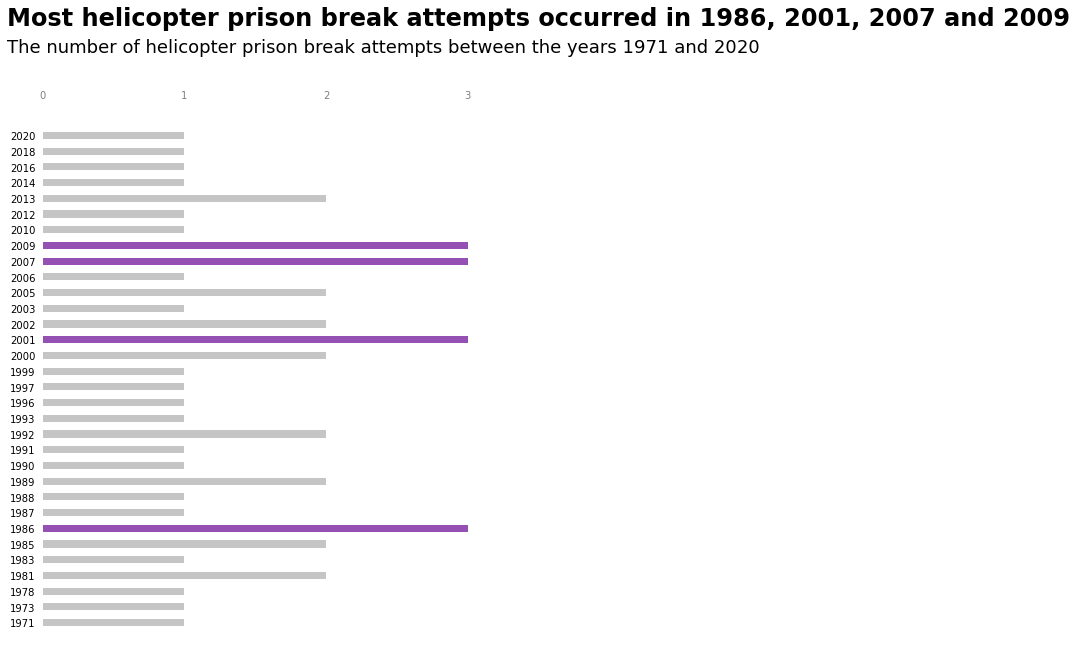

In [11]:
import matplotlib.pyplot as plt
# Run the necessary Jupyter magic so that plots are displayed inline
%matplotlib inline

years = list(attempts_per_year.keys())
values = list(attempts_per_year.values())

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 10))
ax.barh(range(len(attempts_per_year)), values, tick_label=years, height=0.45, color=colour_options)

# Remove the axes (spines)
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

# Relocate the x-tick labels to the top
ax.xaxis.tick_top()    

# Remove the ticks
ax.tick_params(top=False, left=False)

# Remove some of the x-tick labels
ax.set_xticks([0, 1, 2, 3])

# Change the colour the x-tick labels
ax.tick_params(axis='x', colors='grey')

# Add title
ax.text(x=-0.25, y=38, s='Most helicopter prison break attempts occurred in 1986, 2001, 2007 and 2009', 
        weight='bold', size=24)

# Add subtitle
ax.text(x=-0.25, y=36.3, s='The number of helicopter prison break attempts between the years 1971 and 2020', 
        size=18)

plt.show()

Let's identify the countries with the maximum number of prison escapes.

## Identifying the countries with the highest amount of prison break attempts

Instead of using a similar approach as before, we will employ a new method for this analysis.

We use the `pandas.read_html()` function to convert the HTML table of prison break from the [Wikipedia article](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) into a pandas DataFrame and assign it to a variable named `df`.

In [12]:
import pandas as pd

# Scrap the HTML table into a list of pandas DataFrames
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes")[1]

# Exclude the `Details` column from `df`
df = df[["Date", "Prison name", "Country", "Succeeded", "Escapee(s)"]]

We count the frequency of prison escapes per country.

In [13]:
# Get the counts of the unique countries
countries_frequency = df['Country'].value_counts()

We use `print_pretty_table()` from the `helper function` to print the frequency table.

In [14]:
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Mexico,1
Ireland,1


Based on our analysis **France has the highest number of helicopter prison escape attempts, i.e. 15 times**. This is followed by eight attempts from the United States and four attempts from Canada, Greece, and Belgium, respectively.

Next, we will investigate which countries have a higher chance of success for helicopter prison breaks.

## Unravelling the countries with a higher chance of prison break success

First, we need to isolate the unique countries from our dataset.

In [15]:
# Isolate the unique countries
unique_countries = df['Country'].unique()

print('Number of unique countries:', len(unique_countries), '\n')
print('Unique countries:', '\n', unique_countries)

Number of unique countries: 15 

Unique countries: 
 ['Mexico' 'Ireland' 'United States' 'France' 'Canada' 'Australia' 'Brazil'
 'Italy' 'United Kingdom' 'Puerto Rico' 'Chile' 'Netherlands' 'Greece'
 'Belgium' 'Russia']


We create a list of lists named `succeeded_breakdown` to gather the information of the **unique countries, counters for succeeded, unsucceeded and total attempts**. The data for each unique country is grouped under their respective lists. All the counters are set to `0` at the beginning.

In [16]:
succeeded_breakdown = []

# Append the information for each unique country into the list of lists 
for uc in unique_countries:
    succeeded_breakdown.append([uc, 0, 0, 0])  # [unique country, succeeded counter, unsucceeded counter, total]

print(*succeeded_breakdown, sep='\n')

['Mexico', 0, 0, 0]
['Ireland', 0, 0, 0]
['United States', 0, 0, 0]
['France', 0, 0, 0]
['Canada', 0, 0, 0]
['Australia', 0, 0, 0]
['Brazil', 0, 0, 0]
['Italy', 0, 0, 0]
['United Kingdom', 0, 0, 0]
['Puerto Rico', 0, 0, 0]
['Chile', 0, 0, 0]
['Netherlands', 0, 0, 0]
['Greece', 0, 0, 0]
['Belgium', 0, 0, 0]
['Russia', 0, 0, 0]


We calculate the numbers of succeeded, unsucceeded and total attempts for each country by using two `for loops` and conditional statements.

In [17]:
for row in data:
    country = row[2]
    success_status = row[3]
    
    for sb in succeeded_breakdown:
        if sb[0] == country:
            sb[3] += 1    # Total number of prison breaks
            
            if success_status == 'Yes':
                sb[1] += 1    # counter for succeeded attempts
            else:
                sb[2] += 1    # counter for unsucceeded attempts

print('\033[4m' + 'Country, succeeded, unsucceeded, total:' + '\033[0m')
print(*succeeded_breakdown, sep='\n')

Country, succeeded, unsucceeded, total:
['Mexico', 1, 0, 1]
['Ireland', 1, 0, 1]
['United States', 6, 2, 8]
['France', 11, 4, 15]
['Canada', 3, 1, 4]
['Australia', 1, 1, 2]
['Brazil', 2, 0, 2]
['Italy', 1, 0, 1]
['United Kingdom', 1, 1, 2]
['Puerto Rico', 1, 0, 1]
['Chile', 1, 0, 1]
['Netherlands', 0, 1, 1]
['Greece', 2, 2, 4]
['Belgium', 2, 2, 4]
['Russia', 1, 0, 1]


From `succeeded_breakdown`, we have obtained the numbers of succeeded, unsucceeded and total attempts. We further analyse the result by using a bar chart.

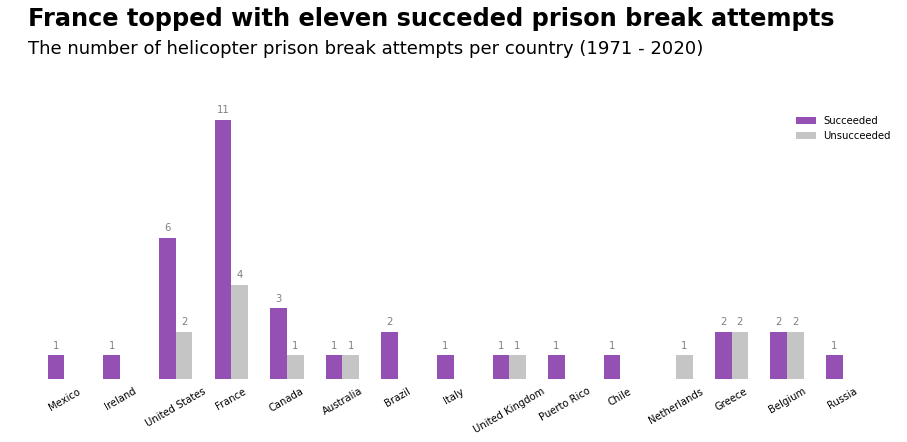

In [18]:
import numpy as np

succeeded_list = []    # List for succeeded attempts
unsucceeded_list = []    # List for unsucceeded attempts

# Assign the numbers of succeeded and unsucceeded attempts in their respective lists
for sb in succeeded_breakdown:
    succeeded_list.append(sb[1])
    unsucceeded_list.append(sb[2])

x = np.arange(len(unique_countries))  # The label locations
width = 0.3  # The width of the bars    

# Create a vertical bar plot
plt.figure(figsize=(16, 5))
ax1 = plt.subplot()
ax2 = plt.subplot()
axes = [ax1, ax2]

ax1.bar(x - width/2, succeeded_list, width, label='Succeeded', color='#9450B3')
ax2.bar(x + width/2, unsucceeded_list, width, label='Unsucceeded', color='#C5C5C5')

for ax in axes:
    # Remove the axes (spines)
    for location in ['left', 'right', 'bottom', 'top']:
        ax.spines[location].set_visible(False)
    
    # Remove the ticks
    ax.tick_params(left=False, bottom=False)
    
    # Remove the labels for y-ticks
    ax.set_yticks([])
    
    # Add the labels for x-ticks
    ax.set_xticks(x, unique_countries)
    
    # Place a legend & remove the frame
    ax.legend(frameon=False)

# Add value label to the bars 
threshold = 0
for c in ax.containers:
    # Filter the labels with the value of `0`
    labels = [value if value > threshold else "" for value in c.datavalues]    
    ax.bar_label(c, labels=labels, padding=5, color='grey')

# Rotate the labels of the x-axis.
plt.xticks(rotation=30)

# Add title
ax.text(x=-0.65, y=15, s='France topped with eleven succeded prison break attempts', 
        weight='bold', size=24)

# Add subtitle
ax.text(x=-0.65, y=13.8, s='The number of helicopter prison break attempts per country (1971 - 2020)', 
        size=18)    
    
plt.show()

**France and the United States**, respectively, have **the highest and the second-highest succeeded attempts**. Nevertheless, we **could not conclude** that these two countries have a higher chance of prison break success, as they simply have a higher total number of attempts.

To answer the question, we need to calculate the percentage of succeeded attempts per country.

In [19]:
succeeded_percentage = []

for sb in succeeded_breakdown:
    country_sb = sb[0]
    succeeded_attempts = sb[1]
    total_attempts = sb[3]
    
    percentage = round(succeeded_attempts / total_attempts * 100, 1)
    succeeded_percentage.append([country_sb, percentage])

In [20]:
print('\033[4m' + 'Percentage of Succeeded Attempts:' + '\033[0m')

for sp in succeeded_percentage:
    print('{:<18} {:<5} {:<1}'.format(sp[0], sp[1], '%'))

Percentage of Succeeded Attempts:
Mexico             100.0 %
Ireland            100.0 %
United States      75.0  %
France             73.3  %
Canada             75.0  %
Australia          50.0  %
Brazil             100.0 %
Italy              100.0 %
United Kingdom     50.0  %
Puerto Rico        100.0 %
Chile              100.0 %
Netherlands        0.0   %
Greece             50.0  %
Belgium            50.0  %
Russia             100.0 %


We visualise the data by using a bar chart. Before plotting a bar chart, we assign purple bars to countries with a 100% prison break success rate and light grey to countries below 100%.

In [21]:
# Appending Hex colour codes
for sp in succeeded_percentage:
    percentage = sp[1]
    if percentage == 100:
        sp.append('#9450B3')  # Hex code for purple
    else:
        sp.append('#C5C5C5')  # Hex code for light grey

print(*succeeded_percentage, sep='\n')

['Mexico', 100.0, '#9450B3']
['Ireland', 100.0, '#9450B3']
['United States', 75.0, '#C5C5C5']
['France', 73.3, '#C5C5C5']
['Canada', 75.0, '#C5C5C5']
['Australia', 50.0, '#C5C5C5']
['Brazil', 100.0, '#9450B3']
['Italy', 100.0, '#9450B3']
['United Kingdom', 50.0, '#C5C5C5']
['Puerto Rico', 100.0, '#9450B3']
['Chile', 100.0, '#9450B3']
['Netherlands', 0.0, '#C5C5C5']
['Greece', 50.0, '#C5C5C5']
['Belgium', 50.0, '#C5C5C5']
['Russia', 100.0, '#9450B3']


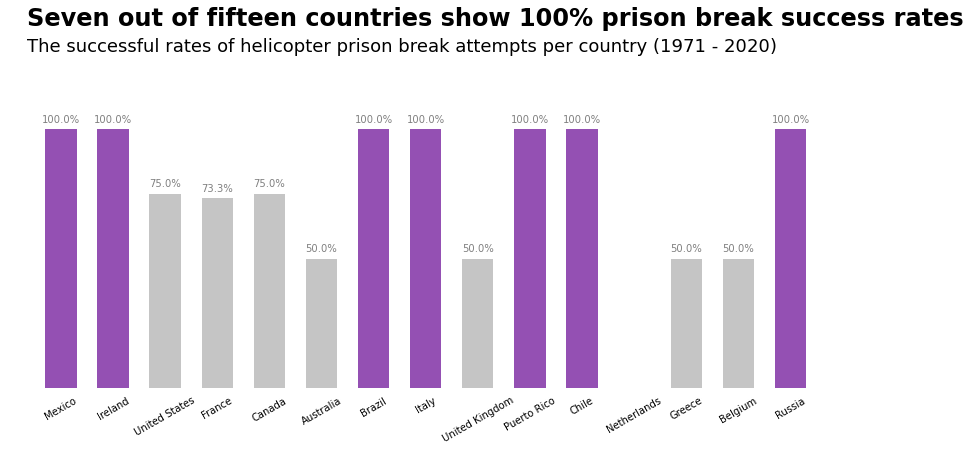

In [22]:
plt.figure(figsize=(15, 5))
ax = plt.subplot()

for sp in succeeded_percentage:
    country_sp = sp[0]
    percentage = sp[1]
    colour_code = sp[2]
    ax.bar(country_sp, percentage, width=0.6, color=colour_code)
    
# Remove the axes (spines)
for location in ['left', 'right', 'bottom', 'top']:
        ax.spines[location].set_visible(False)    

# Remove the ticks
ax.tick_params(left=False, bottom=False)

# Remove the labels for y-ticks
ax.set_yticks([])

# Add value label to the bars 
threshold = 0
for c in ax.containers:
    # Filter the labels with the value of `0`
    labels = [f'{value}%' if value > threshold else "" for value in c.datavalues]    
    ax.bar_label(c, labels=labels, padding=5, color='grey')

# Rotate the labels of the x-axis
plt.xticks(rotation=30)

# Add title
ax.text(x=-0.65, y=140, s='Seven out of fifteen countries show 100% prison break success rates', 
        weight='bold', size=24)

# Add subtitle
ax.text(x=-0.65, y=130, s='The successful rates of helicopter prison break attempts per country (1971 - 2020)', 
        size=18)    

plt.show()

At first glance, countries with the highest success rate (i.e. 100%) are Mexico, Ireland, Brazil, Italy, Puerto Rico, Chile and Russia. 

However, is it true? 

Unfortunately, **we could not draw any conclusion statistically, as all the mentioned countries only have one or two total prison break attempts**.

## Investigating whether the number of escapees affects success

We want to investigate whether the number of escapees impacts the success of prison break attempts.  The intuitive way to do this is to calculate the number of escapees for every prison break attempt.

Let's examine the escapee(s) column:

In [23]:
for row in data[:3]:
    print(row[4])

Joel David Kaplan Carlos Antonio Contreras Castro
JB O'Hagan Seamus TwomeyKevin Mallon
Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson


Unfortunately, it is impossible to count the number of escapee(s) due to the following reasons:
- Lack of separators, such as a comma, to separate the escapee names.
- Some names are merged. For example:
    - Second row: *Twomey* is merged with *Kevin*
    - Third row: *Trapnell* is merged with Martin and *McNally* is merged with *James*, etc

An alternative way to determine the number of escapees is to **calculate the length of the escapees' names per attempt**. We do this by making an **assumption that the longer their combined names, the more the escapees**. It is not the perfect solution, yet it can give us a brief idea about the correlation between the number of escapees and the chance of success.

We use a `for loop` and conditional statements to 
1. remove the empty entries (i.e. '—'),  and 
2. gather the names and the length of the names of the escapees into the `successful` and `unsuccessful` lists, respectively.

Each of them is a list of lists, which contains inner lists in the format of escapee names and their length, i.e. number of characters.

In [24]:
successful = []    # The succeeded escapees in the format of (names, length of the names)
unsuccessful = []    # The unsucceeded escapees in the format of (names, length of the names)

for row in data:
    success_status = row[3]
    escapees_names = row[4]
    
    # Remove empty entries
    if escapees_names != '—':
        # Gather the info of the succeeded escapees
        if success_status == 'Yes':
            successful.append([escapees_names, len(escapees_names)])
        
        # Gather the info of the unsucceeded escapees
        else:
            unsuccessful.append([escapees_names, len(escapees_names)])

print('\033[4m' + 'Successful Attempts' + '\033[0m')
print('> Number of attempts:    ', len(successful), '\n')
print(*successful, sep='\n')

print('\n' + '\033[4m' + 'Unsuccessful Attempts' + '\033[0m')
print('> Number of attempts:    ', len(unsuccessful), '\n')
print(*unsuccessful, sep='\n')

Successful Attempts
> Number of attempts:     31 

['Joel David Kaplan Carlos Antonio Contreras Castro', 49]
["JB O'Hagan Seamus TwomeyKevin Mallon", 36]
['Gérard DupréDaniel Beaumont', 27]
['James Rodney LeonardWilliam Douglas BallewJesse Glenn Smith', 59]
['José Carlos dos Reis Encina, a.k.a. "Escadinha"', 47]
['Michel Vaujour', 14]
['Samantha Lopez', 14]
['André BellaïcheGianluigi EspositoLuciano Cipollari', 50]
['Sydney DraperJohn Kendall', 25]
['Mahoney Danny Francis MitchellRandy Lackey', 42]
['Ralph BrownFreddie Gonzales', 27]
['Robert FordDavid Thomas', 23]
['William Lane', 12]
['Four members of the Manuel Rodriguez Patriotic Front', 52]
['John Killick', 12]
['Steven Whitsett', 15]
['Pascal Payet', 12]
['Abdelhamid CarnousEmile Forma-SariJean-Philippe Lecase', 54]
['Orlando Cartagena Jose Rodriguez Victor Diaz Hector Diaz Jose Tapia', 67]
['Eric AlboreoFranck PerlettoMichel Valero', 40]
['Hubert SellesJean-Claude MorettiMohamed Bessame', 47]
['Vassilis Paleokostas', 20]
['Eric 

We want to visualise the results on horizontal bar plots, which include lines representing the average length of the name characters. Let's compute the average length of escapees' names.

In [25]:
def average_length(alist):
    total = 0
    
    for innerlist in alist:
        name_length = innerlist[1]   # The number of characters including white space
        total += name_length
    avg = total / len(alist)
    return avg

average_successful = round(average_length(successful))
average_unsuccessful = round(average_length(unsuccessful))

print('\033[4m' + "Average length of escapees' names" + '\033[0m')
print('{:<24} {}'.format("Successful attempts:", average_successful))
print('{:<24} {}'.format("Unsuccessful attempts:", average_unsuccessful))

Average length of escapees' names
Successful attempts:     31
Unsuccessful attempts:   23


Next, we label the bars of the escapee(s) in two different colours based on the length of their names:
- Same as or above average: Purple
- Below average: light grey

We append the Hex codes in the `successful` and `unsuccessful` lists.

In [26]:
# Appending Hex colour codes
def colour_length_name(alist, len_average):
    for innerlist in alist:
        length = innerlist[1]
        if length >= len_average:
            innerlist.append('#9450B3')  # Hex code for purple
        else:
            innerlist.append('#C5C5C5')  # Hex code for light grey
    return alist

# For the successful attempts
successful = colour_length_name(successful, average_successful)

# For the unsuccessful attempts
unsuccessful = colour_length_name(unsuccessful, average_unsuccessful)

Let's check the percentage of the length of the names that are above the average length.

In [27]:
def percentage_above_avg(alist):
    counter = 0
    
    for innerlist in alist:
        if innerlist[2] == '#9450B3':
            counter += 1
    
    percentage = counter / len(alist) *100
    return round(percentage, 1)

# For the successful attempts
percentage_successful = percentage_above_avg(successful)

# For the unsuccessful attempts
percentage_unsuccessful = percentage_above_avg(unsuccessful)

print('\033[4m' + "The percentage of the length of the escapees' names that are above the average length" + '\033[0m')
print('{:24} {:5} {}'.format('Successful attempts:', percentage_successful, '%'))
print('{:24} {:5} {}'.format('Unsuccessful attempts:', percentage_unsuccessful, '%'))

The percentage of the length of the escapees' names that are above the average length
Successful attempts:      45.2 %
Unsuccessful attempts:    30.0 %


Everything we need is ready now, and it is time to generate a bar plot!

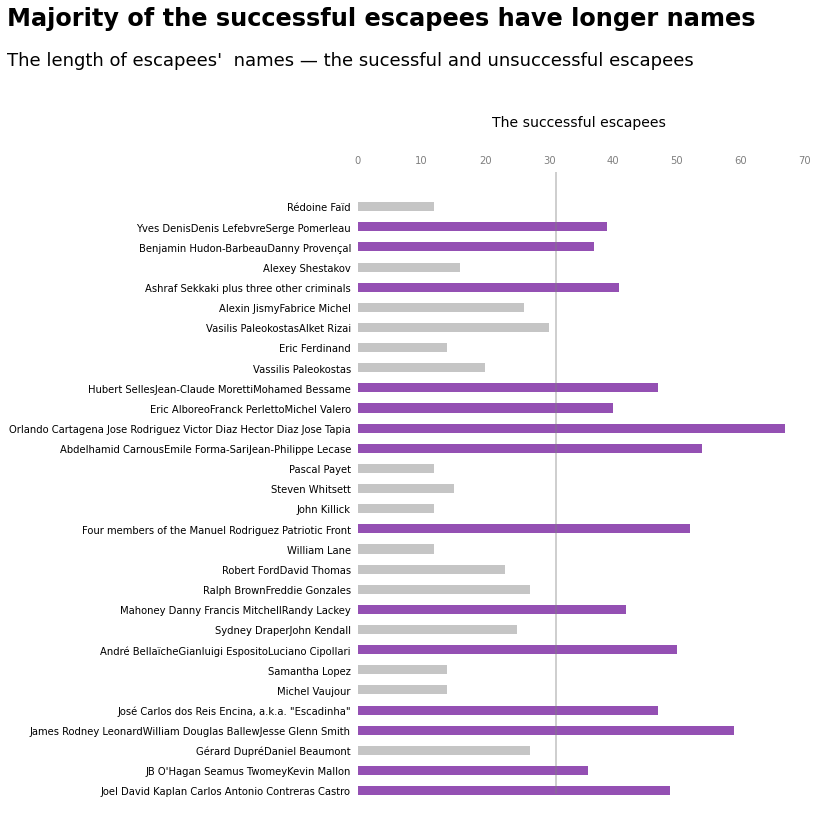

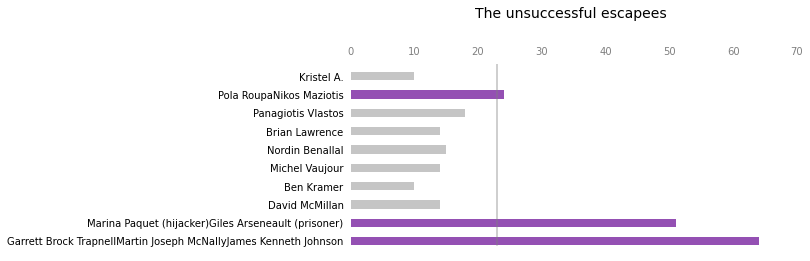

In [28]:
# Plot a bar plot for the successful attempts
fig, ax1 = plt.subplots(figsize=(8, 12))
for suc in successful:
    ax1.barh(suc[0], suc[1], height=0.45, color=suc[2])  # suc[0] = names, suc[1] = length of the names, suc[2] = Hex code

# Plot a bar plot for the unsuccessful attempts
fig, ax2 = plt.subplots(figsize=(8, 3.5))
for unsuc in unsuccessful:
    ax2.barh(unsuc[0], unsuc[1], height=0.45, color=unsuc[2])  # suc[0] = names, suc[1] = length of the names, suc[2] = Hex code

axes = [ax1, ax2]

for ax in axes:
    # Remove the axes (spines)
    for location in ['left', 'right', 'bottom', 'top']:
        ax.spines[location].set_visible(False)
    
    # Relocate the x-tick labels to the top
    ax.xaxis.tick_top() 
    
    # Remove the ticks
    ax.tick_params(top=False, left=False)
    
    # Change the colour the x-tick labels
    ax.tick_params(axis='x', colors='grey')
    
    # Set the x-axis view limits
    ax.set_xlim(0, 70)

# Draw a vertical line to represent the average length of the names
ax1.axvline(x=31, ymin=0.048, c='grey', alpha=0.5) 
ax2.axvline(x=23, ymin=0.048, c='grey', alpha=0.5) 

# Add figure title and subtitle
ax1.text(x=-55, y=38, s='Majority of the successful escapees have longer names', 
        weight='bold', size=24)

ax1.text(x=-55, y=36, s="The length of escapees'  names — the sucessful and unsuccessful escapees", size=18)

# Add ax1 title
ax1.text(x=21, y=33, s='The successful escapees', size=14)

# Add ax2 title
ax2.text(x=19.5, y=12.2, s='The unsuccessful escapees', size=14)

plt.show()

The average length of names for successful escapees is 31 characters, whereas it is only 23 characters for unsuccessful escapees. 45.2% of the successful escapee's names are above their average length, while there are only 30.0% for unsuccessful escapees. In other words, **the longer the escapee's names — an indication of higher number of escapees — the greater the success chance of prison break attempts**.

## Identifying the escapees with multiple times prison break attempts

Let's find out which escapees have done it more than one time.

In [29]:
# Get the counts of the unique escapees
escapees_frequency = df['Escapee(s)'].value_counts()

In [30]:
print(escapees_frequency)

—                                                                      7
Michel Vaujour                                                         2
Pascal Payet                                                           2
Joel David Kaplan Carlos Antonio Contreras Castro                      1
Vasilis PaleokostasAlket Rizai                                         1
Orlando Cartagena Jose Rodriguez Victor Diaz Hector Diaz Jose Tapia    1
Eric AlboreoFranck PerlettoMichel Valero                               1
Hubert SellesJean-Claude MorettiMohamed Bessame                        1
Vassilis Paleokostas                                                   1
Eric Ferdinand                                                         1
Nordin Benallal                                                        1
Ashraf Sekkaki plus three other criminals                              1
Alexin JismyFabrice Michel                                             1
Brian Lawrence                                     

Unfortunately, the escapee(s) information for seven prison breaks was missing. With the existing data, **Michel Vaujour** and **Pascal Payet**, from France, have done prison breaks twice, respectively.

## Conclusion

The goal of this project is to study the patterns of helicopter prison breaks between the years 1971 to 2020. By using basic Python techniques and Matplotlib, our findings show that:

- The highest prison break attempts are three times, which happened in years **1986, 2001, 2007 and 2009**.
- **France** with a total of **15 attempts**, is the top country for helicopter prison breaks.
- We **could not statistically conclude the countries with the greatest chance of success**, as all the countries with 100% success rate only had one to two prison break attempts. 
- The **longer the escapees' names**, the **greater** the chance of **prison break success**. This is based on the assumption that the number of escapees positively correlate with the lengths of their combined names.
- **Michel Vaujour** and **Pascal Payet** from France, have committed helicopter prison break **twice** respectively.